# Project Name :- NLP Project for Disaster Tweet Classification.

In [1]:
# importing important liberaries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset.

df = pd.read_csv("twitter_disaster.csv")

In [4]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Data Exploration.

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
# info() :- info function tells about the column names, non-null values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df.isnull().sum()

# There are missing values in keyword and location columns.

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
# Filling the missing values.
df["keyword"]=df["keyword"].fillna(df["keyword"].mode()[0])
df["location"]=df["location"].fillna(df["location"].mode()[0])

In [10]:
# Again checking for null values.
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


# Performing Class Distribution.

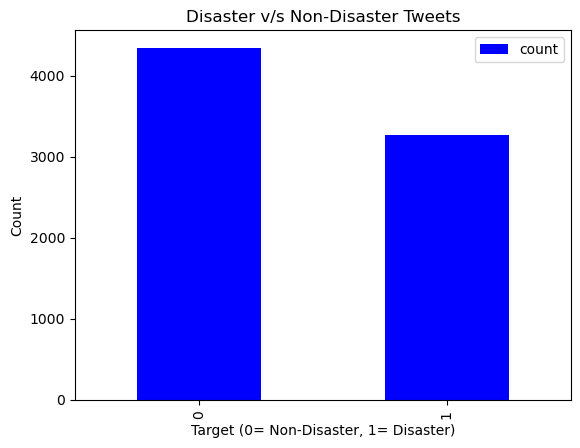

In [12]:
df["target"].value_counts().plot(kind="bar",color="Blue").legend()
plt.title("Disaster v/s Non-Disaster Tweets")
plt.xlabel("Target (0= Non-Disaster, 1= Disaster)")
plt.ylabel("Count")
plt.show()

## The above bar plots gives the following insights :- 

**1. It shows the frequency count of Disaster and Non-Disaster Tweets.**

**2. The Non-Disaster tweets are represented by 0 whereas Disaster tweets are shown by 1.**

**3. The Non-Disaster tweets are around 4500.**    

**4. The Disaster tweets are around 3500.**    

# Frequency of keywords

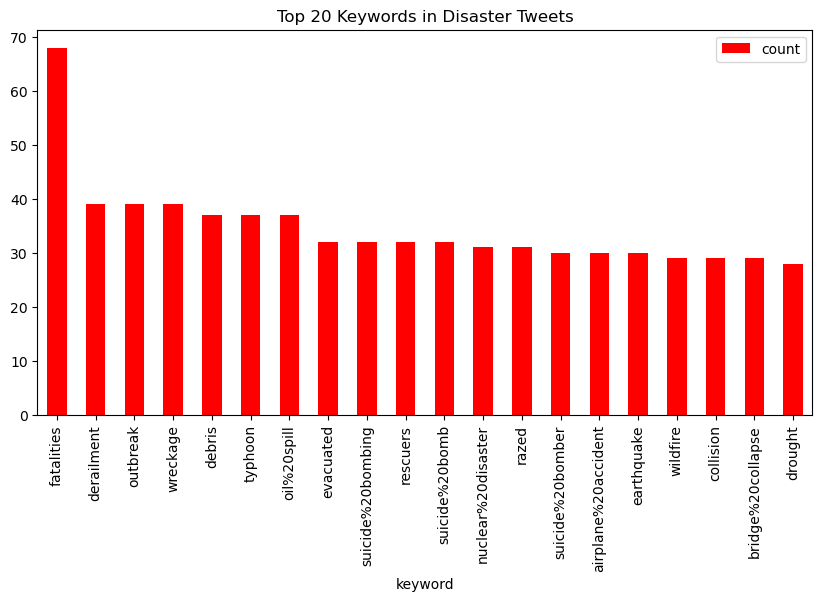

In [13]:
plt.figure(figsize=(10,5))
top_keywords=df[df["target"] ==1]["keyword"].value_counts().head(20)
top_keywords.plot(kind="bar",color="Red").legend()
plt.title("Top 20 Keywords in Disaster Tweets")
plt.show()

**This bar plot reveals the top 20 keywords most frequently associated with disaster-related tweets.** 

**It highlights key themes such as "fatalities", "damage", and "evacuation", which are crucial indicators for identifying real disaster events in text data.**

# Tweet Length Distribution.

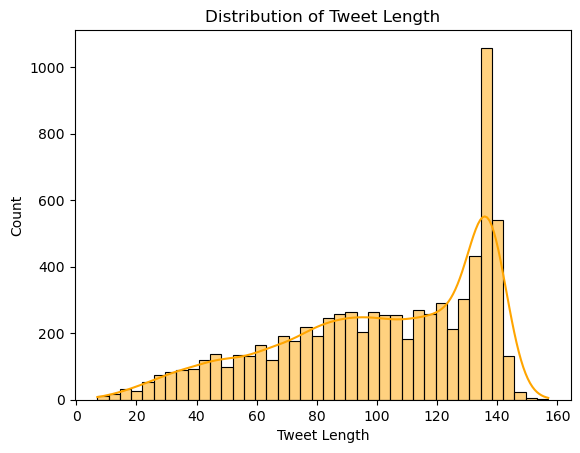

In [14]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], kde=True, bins=40,color="Orange")
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

**This plot shows that most tweets have a length between 50 and 100 characters, with a peak around 70 characters.** 
    
**It indicates that tweet lengths are fairly consistent, which can help in optimizing text preprocessing and model input length.**

# Histogram: Tweet Length by Target Class

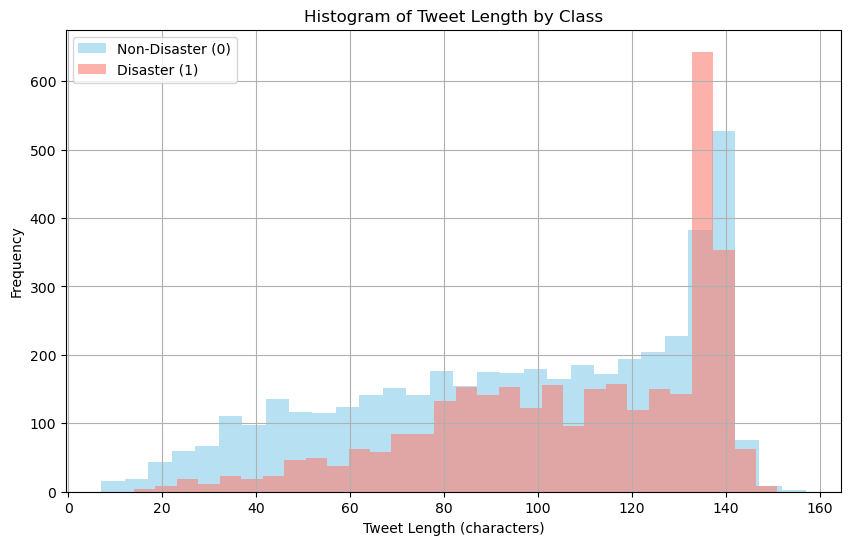

In [15]:
# Histogram
plt.figure(figsize=(10,6))
df[df['target']==0]['text_length'].hist(alpha=0.6, bins=30, label='Non-Disaster (0)', color='skyblue')
df[df['target']==1]['text_length'].hist(alpha=0.6, bins=30, label='Disaster (1)', color='salmon')
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Length by Class")
plt.legend()
plt.show()

**This histogram shows that disaster tweets tend to be slightly longer than non-disaster tweets.**
    
**Both distributions are right-skewed, with most tweets under 150 characters, but disaster tweets have a longer tail.**

# Histogram: Word Count by Target Class

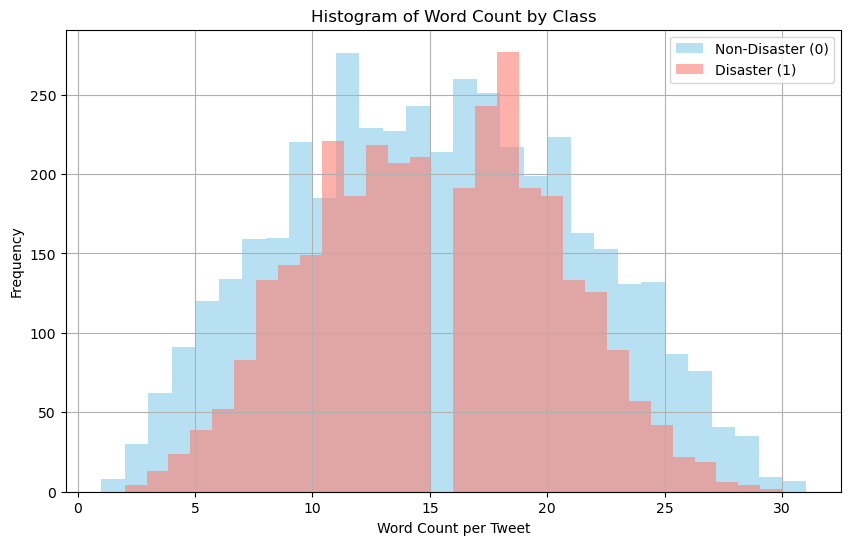

In [16]:
# Word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Histogram
plt.figure(figsize=(10,6))
df[df['target']==0]['word_count'].hist(alpha=0.6, bins=30, label='Non-Disaster (0)', color='skyblue')
df[df['target']==1]['word_count'].hist(alpha=0.6, bins=30, label='Disaster (1)', color='salmon')
plt.xlabel("Word Count per Tweet")
plt.ylabel("Frequency")
plt.title("Histogram of Word Count by Class")
plt.legend()
plt.show()

**This histogram reveals that disaster-related tweets generally contain more words than non-disaster tweets.** 
    
**The word count distribution for both classes is right-skewed, with disaster tweets having a broader spread and longer tails.**

# Bar Plot: Average Tweet Length per Class

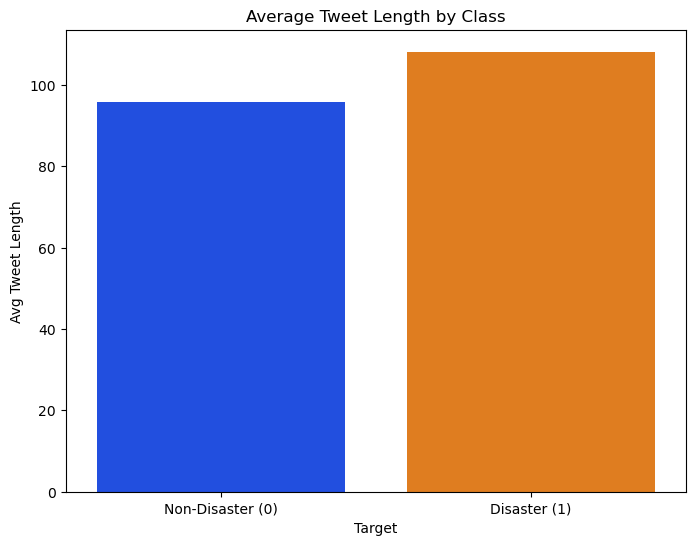

In [17]:
avg_lengths = df.groupby('target')['text_length'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='target', y='text_length', data=avg_lengths, palette='bright')
plt.xticks([0, 1], ['Non-Disaster (0)', 'Disaster (1)'])
plt.title('Average Tweet Length by Class')
plt.ylabel('Avg Tweet Length')
plt.xlabel('Target')
plt.show()

**The bar plot reveals that disaster-related tweets (target = 1) tend to be slightly longer on average than non-disaster tweets.**
    
**This suggests that users may provide more detailed information during disaster events.**

# Correlation Matrix for Numerical Columns.

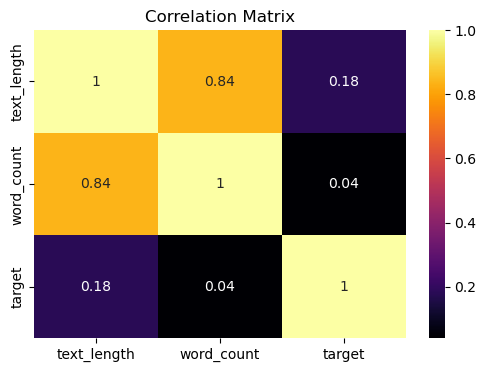

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['text_length', 'word_count', 'target']].corr(), annot=True, cmap='inferno')
plt.title("Correlation Matrix")
plt.show()

# The above Heatmap gives the following insights :-

**This correlation heatmap shows a moderate positive correlation between text_lenght and word_count.** 
    
**However, both text_len and word_count have very weak correlations with target.**
    
**Suggesting that tweet length or word count alone is not a strong predictor of whether a tweet is about a disaster.**

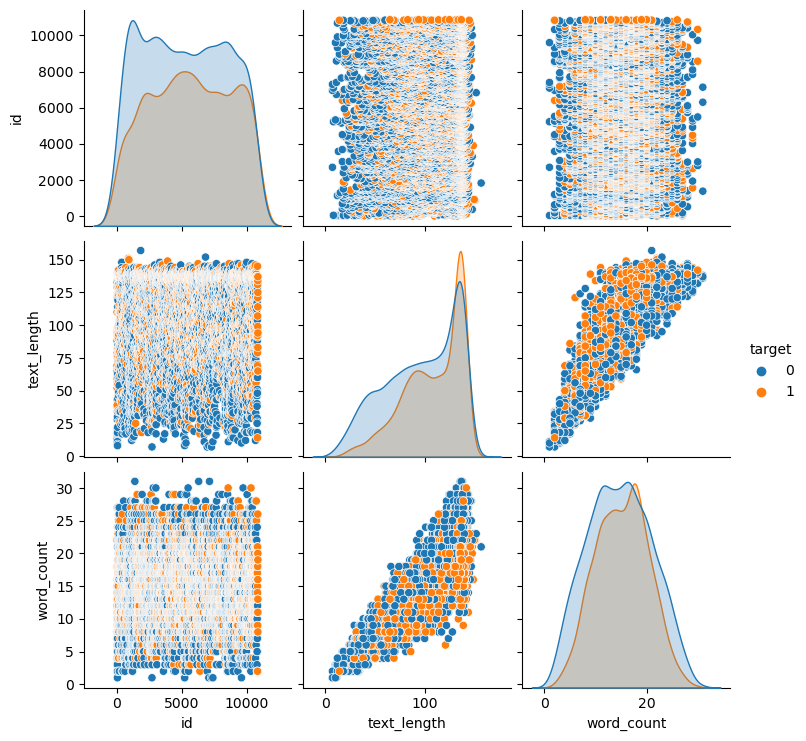

In [19]:
sns.pairplot(df,hue="target")
plt.show()

# Checking outliers for numerical columns.

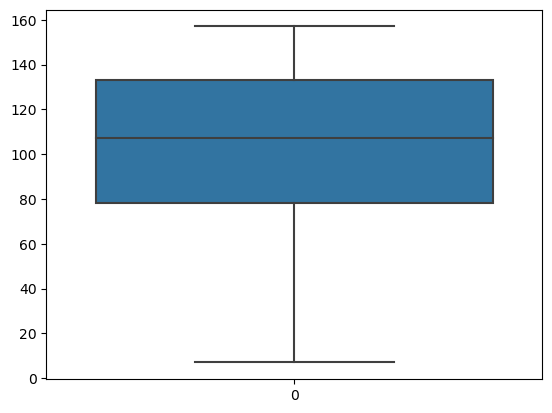

In [20]:
sns.boxplot(df["text_length"])
plt.show()

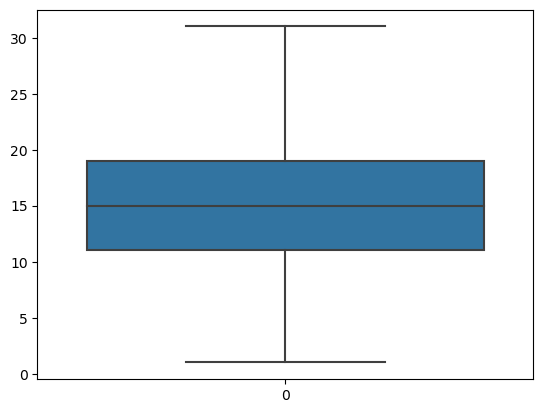

In [21]:
sns.boxplot(df["word_count"])
plt.show()

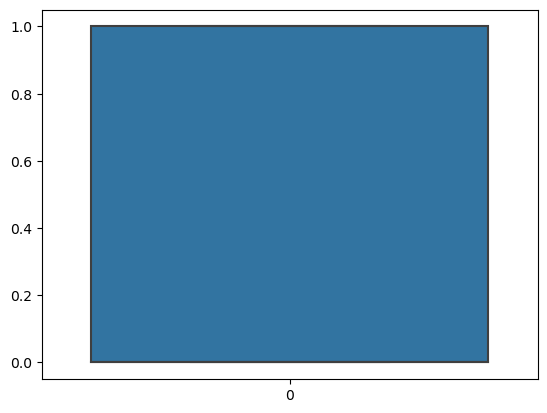

In [22]:
sns.boxplot(df["target"])
plt.show()

# Word Cloud

In [23]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from wordcloud import WordCloud

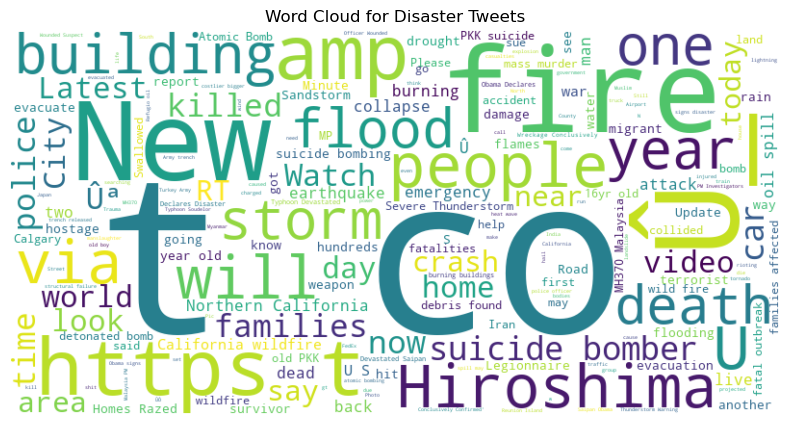

In [25]:
text_disaster = " ".join(df[df['target'] == 1]['text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text_disaster)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Disaster Tweets")
plt.show()

**The Word Cloud reveals the most frequent terms in disaster-related tweets.** 

**Prominent words such as "Fire," "Emergency," "Storm," "Sucide Bomber" dominate, reflecting the urgent and critical language commonly used during actual disasters.**

# Text Cleaning and Pre-Processing.

In [26]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [27]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    ...
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(cleaned_tokens)

# Define Cleaning Function

In [29]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags 
    
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)  # Remove '#' symbol only, keep the word
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short tokens
    cleaned_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    return " ".join(cleaned_tokens)

# Apply to Dataset.

In [30]:
df['clean_text'] = df['text'].apply(clean_text)

In [31]:
df_filtered = df.copy()  
df_filtered['clean_text'] = df_filtered['text'].apply(clean_text)

**The clean_text function removes noise like URLs, mentions, punctuation, numbers, and stopwords from tweets, producing a cleaner text format.**

**This preprocessing step enhances model performance by focusing on meaningful words, reducing dimensionality and irrelevant variance in the data.**

# Vectorize using TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf.fit_transform(df_filtered['clean_text'])

In [33]:
df['has_link'] = df['text'].apply(lambda x: 1 if 'http' in x else 0)
df['has_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['has_hashtag'] = df['text'].apply(lambda x: 1 if '#' in x else 0)

# Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Vectorize the Cleaned Text


In [35]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])  

y = df['target']  # 0: Non-disaster, 1: Disaster

**TF-IDF vectorization has transformed the cleaned tweet texts into numerical features, capturing the importance of terms across the dataset.**

**These features (X) paired with the target labels (y) are now ready for training classification models to predict disaster-related tweets.**

# Train-Test Split.

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Training and Evaluation

In [37]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

In [38]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"📌 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("-" * 50)

📌 Logistic Regression Performance:
Accuracy: 0.7957977675640184
Precision: 0.8176691729323309
Recall: 0.6702619414483821
F1 Score: 0.7366638441998307
--------------------------------------------------
📌 Naive Bayes Performance:
Accuracy: 0.7984241628365069
Precision: 0.8109090909090909
Recall: 0.687211093990755
F1 Score: 0.74395329441201
--------------------------------------------------
📌 Random Forest Performance:
Accuracy: 0.7688772160210111
Precision: 0.7600700525394045
Recall: 0.6687211093990755
F1 Score: 0.7114754098360656
--------------------------------------------------


**Among the tested models, Logistic Regression and Naive Bayes generally offer high precision and balanced performance for disaster tweet classification.**

In [39]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

In [41]:
# Example preprocessing & data split
X = df['clean_text']
y = df['target']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])
params = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.9, 1.0],
    'clf__C': [0.1, 1, 10]
}

# Train model
model = LogisticRegression()
model.fit(x_train, y_train)

# Save model
joblib.dump(model, 'model.pkl')

# Save vectorizer
joblib.dump(tfidf, 'vectorizer.pkl')

['vectorizer.pkl']

In [42]:
df = df[['text', 'target']] 

In [43]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)

# Using Deep Learning Algorithms (LSTM)

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Step 1: Create and fit tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'].values)

# Step 2: Convert text to sequences and pad
sequences = tokenizer.texts_to_sequences(df['clean_text'].values)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Step 3: Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [45]:
# Load tokenizer when needed
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Use tokenizer again
new_sequences = tokenizer.texts_to_sequences(["This is a test tweet"])
new_padded = pad_sequences(new_sequences, maxlen=100)

In [46]:
# Save model
joblib.dump(model,"disaster_model.h5")

# Save tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)